# 1. Import Packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
import plotly.graph_objects as go

# 2. Read Data

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving heart_attack_dataset.csv to heart_attack_dataset (2).csv


# 3. Data Cleaning and Preprocessing

In [ ]:
data = pd.read_csv('heart_attack_dataset (2).csv')

In [ ]:
data.head()

,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment
0,Male,70,181,262,No,Never,Typical Angina,Lifestyle Changes
1,Female,55,103,253,Yes,Never,Atypical Angina,Angioplasty
2,Male,42,95,295,Yes,Current,Typical Angina,Angioplasty
3,Male,84,106,270,No,Never,Atypical Angina,Coronary Artery Bypass Graft (CABG)
4,Male,86,187,296,Yes,Current,Non-anginal Pain,Medication


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 1000 non-null   object
 1   Age                    1000 non-null   int64 
 2   Blood Pressure (mmHg)  1000 non-null   int64 
 3   Cholesterol (mg/dL)    1000 non-null   int64 
 4   Has Diabetes           1000 non-null   object
 5   Smoking Status         1000 non-null   object
 6   Chest Pain Type        1000 non-null   object
 7   Treatment              1000 non-null   object
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,60.338,17.317496,30.0,45.0,60.5,76.0,89.0
Blood Pressure (mmHg),1000.0,145.440,31.756525,90.0,118.0,146.0,173.0,199.0
Cholesterol (mg/dL),1000.0,223.789,42.787817,150.0,185.0,225.5,259.0,299.0


In [ ]:
numerical_column_names = data.select_dtypes(include=['number']).columns
print("Numerical Column Names:", numerical_column_names.tolist())

Numerical Column Names: ['Age', 'Blood Pressure (mmHg)', 'Cholesterol (mg/dL)']


In [ ]:
object_column_names = data.select_dtypes(include=['object']).columns
print("Object Column Names:", object_column_names.tolist())

Object Column Names: ['Gender', 'Has Diabetes', 'Smoking Status', 'Chest Pain Type', 'Treatment']


In [ ]:
data.isnull().sum()

,0
Gender,0
Age,0
Blood Pressure (mmHg),0
Cholesterol (mg/dL),0
Has Diabetes,0
Smoking Status,0
Chest Pain Type,0
Treatment,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.nunique()

,0
Gender,2
Age,60
Blood Pressure (mmHg),109
Cholesterol (mg/dL),149
Has Diabetes,2
Smoking Status,3
Chest Pain Type,4
Treatment,4


In [ ]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Gender': ['Male' 'Female']
Unique values in column 'Age': [70 55 42 84 86 66 33 73 63 88 69 78 89 71 30 77 76 74 45 34 61 52 49 81
 39 32 46 67 41 35 80 85 57 79 62 48 36 64 60 50 72 65 40 51 82 75 31 43
 37 38 54 44 59 58 53 83 56 87 47 68]
Unique values in column 'Blood Pressure (mmHg)': [181 103  95 106 187 125 182 115 174 154 133 165 153 110 107 112  91 101
 141 124 109 143 197 149 104 159 193 135 190 129 126 134 172 179 111 192
 180 166 119 139 116 191 120 158 138 198 162 142 169 178 196 164 161 168
 113 185 148 171 176 183 147  97 175 105 145  98 128 195 146 167 163 144
 156 122 152 136 151 150 114 127 186 184 137  96 188 100 173 199 132 160
 194  99  94 170 140 130 123 117 189 157 131 121 118 102  93 108  90  92
 155]
Unique values in column 'Cholesterol (mg/dL)': [262 253 295 270 296 271 288 286 254 150 236 171 215 182 242 179 227 259
 273 212 222 285 266 209 157 191 268 161 274 248 205 280 255 188 246 297
 181 249 258 235 201 204 198 200 186 217 176 23

In [ ]:
print("Number of Rows:",data.shape[0])

Number of Rows: 1000


In [ ]:
print("Number of Columns:",data.shape[1])

Number of Columns: 8


# 4. Descriptive Statistics

In [ ]:
print("Most frequent gender:",data['Gender'].mode()[0])

Most frequent gender: Female


In [ ]:
print("Minimun Age:",data['Age'].min())

Minimun Age: 30


In [ ]:
print("Average Age:",data['Age'].mean().round(2))

Average Age: 60.34


In [ ]:
print("Maximun Age:",data['Age'].max())

Maximun Age: 89


In [ ]:
print("Average Blood Pressure:",data['Blood Pressure (mmHg)'].mean().round(2),'mmHg')

Average Blood Pressure: 145.44 mmHg


In [ ]:
print("Minimun Cholesterol:",data['Cholesterol (mg/dL)'].min(),'mg/dL')

Minimun Cholesterol: 150 mg/dL


In [ ]:
print("Average Cholesterol:",data['Cholesterol (mg/dL)'].mean().round(2),'mm/dL')

Average Cholesterol: 223.79 mm/dL


In [ ]:
print("Maximun Cholesterol:",data['Cholesterol (mg/dL)'].max(),'mg/dL')

Maximun Cholesterol: 299 mg/dL


# 5. Correlation Analysis

In [ ]:
numerical_data = data.select_dtypes(include=['number'])
corr_matrix = numerical_data.corr()

corr_matrix

,Age,Blood Pressure (mmHg),Cholesterol (mg/dL)
Age,1.000000,-0.003303,0.001661
Blood Pressure (mmHg),-0.003303,1.000000,0.044316
Cholesterol (mg/dL),0.001661,0.044316,1.000000


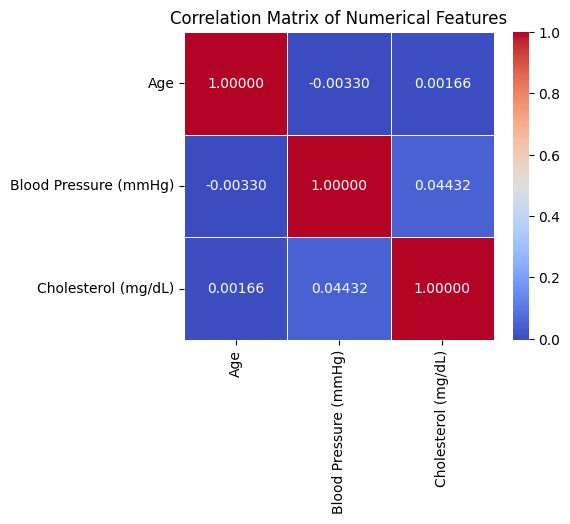

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.5f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 6. Univariate Analysis

In [ ]:
freq = data['Gender'].value_counts().reset_index()
freq.columns = ['Gender', 'Count']

fig = px.bar(
    freq,
    x='Gender',
    y='Count',
    title='Gender',
    labels={'Gender': 'Gender', 'Count': 'Frequency'},
    color='Gender',
    color_discrete_sequence=['#8A2BE2', '#DA70D6']
)

fig.update_layout(width=500, height=500)

fig.show()

In [ ]:
freq = data['Has Diabetes'].value_counts().reset_index()
freq.columns = ['Has Diabetes', 'Count']

fig = px.bar(
    freq,
    x='Has Diabetes',
    y='Count',
    title='Has Diabetes',
    labels={'Has Diabetes': 'Has Diabetes', 'Count': 'Frequency'},
    color='Has Diabetes',
    color_discrete_sequence=['#8A2BE2', '#DA70D6']
)

fig.update_layout(width=500, height=500)

fig.show()

In [ ]:
freq = data['Smoking Status'].value_counts().reset_index()
freq.columns = ['Smoking Status', 'Count']

fig = px.bar(
    freq,
    x='Smoking Status',
    y='Count',
    title='Smoking Status',
    labels={'Smoking Status': 'Smoking Status', 'Count': 'Frequency'},
    color='Smoking Status',
    color_discrete_sequence=['#8A2BE2','#DA70D6', '#D8BFD8']
)

fig.update_layout(width=500, height=500)

fig.show()

In [ ]:
freq_chest_pain = data['Chest Pain Type'].value_counts().reset_index()
freq_chest_pain.columns = ['Chest Pain Type', 'Count']

fig_chest_pain = px.bar(
    freq_chest_pain,
    x='Chest Pain Type',
    y='Count',
    title='Chest Pain Type',
    labels={'Chest Pain Type': 'Chest Pain Type', 'Count': 'Frequency'},
    color='Chest Pain Type',
    color_discrete_sequence=['#8A2BE2', '#6A0D91', '#DA70D6', '#D8BFD8']
)
fig_chest_pain.update_layout(width=600, height=500)

fig_chest_pain.show()

In [ ]:
freq_chest_pain = data['Treatment'].value_counts().reset_index()
freq_chest_pain.columns = ['Treatment', 'Count']

fig_chest_pain = px.bar(
    freq_chest_pain,
    x='Treatment',
    y='Count',
    title='Treatment',
    labels={'Treatment': 'Treatment', 'Count': 'Frequency'},
    color='Treatment',
    color_discrete_sequence=['#8A2BE2', '#6A0D91', '#DA70D6', '#D8BFD8']
)
fig_chest_pain.update_layout(width=700, height=500)

fig_chest_pain.show()

In [ ]:
for i, column in enumerate(['Age', 'Blood Pressure (mmHg)', 'Cholesterol (mg/dL)']):
    fig = px.histogram(
        data,
        x=column,
        title=f'{column}',
        labels={column: column},
        color_discrete_sequence=[['#8A2BE2', '#DA70D6', '#D8BFD8'][i]]  # Different color for each histogram
    )
    fig.update_layout(width=600, height=500)
    fig.show()

# 7. Bivariate Analysis

In [ ]:
freq_gender_diabetes = data.groupby(['Gender', 'Has Diabetes']).size().reset_index(name='Count')

fig = px.bar(
    freq_gender_diabetes,
    x='Gender',
    y='Count',
    color='Has Diabetes',
    title='Gender vs Diabetes Status',
    labels={'Gender': 'Gender', 'Count': 'Frequency', 'Has Diabetes': 'Diabetes Status'},
    color_discrete_sequence=['#8A2BE2', '#DA70D6']
)

fig.update_layout(width=600, height=500)

fig.show()

In [ ]:
freq_gender_diabetes = data.groupby(['Gender', 'Smoking Status']).size().reset_index(name='Count')

fig = px.bar(
    freq_gender_diabetes,
    x='Gender',
    y='Count',
    color='Smoking Status',
    title='Gender vs Smoking Status',
    labels={'Gender': 'Gender', 'Count': 'Frequency', 'Smoking Status': 'Smoking Status'},
    color_discrete_sequence=['#8A2BE2', '#DA70D6','#D8BFD8']
)

fig.update_layout(width=600, height=500)

fig.show()

In [ ]:
freq_gender_chest_pain = data.groupby(['Gender', 'Chest Pain Type']).size().reset_index(name='Count')

fig = px.bar(
    freq_gender_chest_pain,
    x='Chest Pain Type',
    y='Count',
    color='Gender',
    title='Gender vs Chest Pain Type',
    labels={'Chest Pain Type': 'Chest Pain Type', 'Count': 'Frequency', 'Gender': 'Gender'},
    color_discrete_sequence=['#8A2BE2', '#D8BFD8']
)

fig.update_layout(width=600, height=500)

fig.show()

In [ ]:
freq_chest_pain_treatment = data.groupby(['Chest Pain Type', 'Treatment']).size().reset_index(name='Count')

fig = px.bar(
    freq_chest_pain_treatment,
    x='Chest Pain Type',
    y='Count',
    color='Treatment',
    title='Chest Pain Type vs Treatment',
    labels={'Chest Pain Type': 'Chest Pain Type', 'Count': 'Frequency', 'Treatment': 'Treatment'},
    color_discrete_sequence=['#8A2BE2', '#6A0D91', '#DA70D6', '#D8BFD8']  # Shades of violet
)

fig.update_layout(width=800, height=600)

fig.show()

In [ ]:
fig = px.scatter(
    data,
    x='Blood Pressure (mmHg)',
    y='Cholesterol (mg/dL)',
    color='Blood Pressure (mmHg)',
    color_continuous_scale=['#8A2BE2', '#DA70D6'],
    title='Blood Pressure vs Cholesterol',
    labels={'Blood Pressure (mmHg)': 'Blood Pressure (mmHg)', 'Cholesterol (mg/dL)': 'Cholesterol (mg/dL)', 'Blood Pressure (mmHg)': 'Blood Pressure (mmHg)'}
)

fig.update_layout(width=800, height=500)

fig.show()

In [ ]:
fig = px.scatter(
    data,
    x='Age',
    y='Cholesterol (mg/dL)',
    color='Age',
    color_continuous_scale='Viridis',
    title='Age vs Cholesterol',
    labels={'Age': 'Age', 'Cholesterol (mg/dL)': 'Cholesterol (mg/dL)', 'Age': 'Age'}
)

fig.update_layout(width=700, height=500)

fig.show()

In [ ]:
fig = px.scatter(
    data,
    x='Blood Pressure (mmHg)',
    y='Cholesterol (mg/dL)',
    color='Blood Pressure (mmHg)',
    color_continuous_scale=['#FFD700', '#90EE90'],
    title='Blood Pressure vs Cholesterol',
    labels={'Blood Pressure (mmHg)': 'Blood Pressure (mmHg)', 'Cholesterol (mg/dL)': 'Cholesterol (mg/dL)', 'Blood Pressure (mmHg)': 'Blood Pressure (mmHg)'}
)

fig.update_layout(width=800, height=500)

fig.show()

# 8. Multivariate Analysis

In [ ]:
fig = px.scatter_3d(
    data,
    x='Age',
    y='Blood Pressure (mmHg)',
    z='Cholesterol (mg/dL)',
    color='Age',
    color_continuous_scale='Viridis',
    title='Scatter Plot of Age, Blood Pressure, and Cholesterol',
    labels={'Age': 'Age', 'Blood Pressure (mmHg)': 'Blood Pressure (mmHg)', 'Cholesterol (mg/dL)': 'Cholesterol (mg/dL)'}
)

fig.update_layout(width=800, height=600)

fig.show()

In [ ]:
freq = data.groupby(['Gender', 'Has Diabetes', 'Smoking Status']).size().reset_index(name='Count')

fig = px.bar(
    freq,
    x='Has Diabetes',
    y='Count',
    color='Smoking Status',
    facet_col='Gender',
    title='Gender, Has Diabetes, and Smoking Status',
    labels={'Has Diabetes': 'Has Diabetes', 'Count': 'Frequency', 'Smoking Status': 'Smoking Status'},
    color_discrete_sequence=['#8A2BE2', '#6A0D91', '#DA70D6', '#D8BFD8']
)

fig.update_layout(width=900, height=600)

fig.show()

In [ ]:
freq = data.groupby(['Has Diabetes', 'Smoking Status', 'Chest Pain Type']).size().reset_index(name='Count')

fig = px.bar(
    freq,
    x='Has Diabetes',
    y='Count',
    color='Chest Pain Type',
    facet_col='Smoking Status',
    title='Comparison of Has Diabetes, Smoking Status, and Chest Pain Type',
    labels={'Has Diabetes': 'Has Diabetes', 'Count': 'Frequency', 'Chest Pain Type': 'Chest Pain Type'},
    color_discrete_sequence=['#8A2BE2', '#6A0D91', '#DA70D6', '#D8BFD8']  # Custom color sequence
)

fig.update_layout(width=1000, height=600)

fig.show()

In [ ]:
freq = data.groupby(['Gender', 'Chest Pain Type', 'Treatment']).size().reset_index(name='Count')

fig = px.bar(
    freq,
    x='Chest Pain Type',
    y='Count',
    color='Treatment',
    facet_col='Gender',
    title='Comparison of Gender, Chest Pain Type, and Treatment',
    labels={'Chest Pain Type': 'Chest Pain Type', 'Count': 'Frequency', 'Treatment': 'Treatment'},
    color_discrete_sequence=['#8A2BE2', '#6A0D91', '#DA70D6', '#D8BFD8']  # Custom color sequence
)

fig.update_layout(width=1000, height=600)

fig.show()

# 9. Conclusion

* Age Distribution -> The minimum age is 30 years, while the maximum is 89 years. The average age of individuals in the dataset is approximately 60.34 years. This indicates a wide range of ages with a slightly higher concentration in older adults.
* Blood Pressure -> The minimum recorded blood pressure is 90 mmHg, and the maximum is 199 mmHg. The average blood pressure is 145.44 mmHg, suggesting a generally high average blood pressure level among the individuals in the dataset.
* Cholesterol Levels -> Cholesterol levels range from a minimum of 150 mg/dL to a maximum of 299 mg/dL. The average cholesterol level is 223.79 mg/dL, indicating that most individuals have elevated cholesterol levels.

**Correlation:**

* Age and Blood Pressure: Almost no relationship, indicating age has a minimal impact on blood pressure.
* Blood Pressure and Cholesterol: Very weak positive correlation, suggesting a minimal connection between these two variables.
* Age and Cholesterol: Negligible correlation, indicating that age does not significantly influence cholesterol levels.